In [4]:
%pylab inline
import tellurium as te
from SloppyCell.ReactionNetworks import *
from pandas import *

Populating the interactive namespace from numpy and matplotlib


In [69]:
def data_formater(data,genotypes,genes ,nuclei_number_gFW, displacement):
    '''
    Formating of data for sloppycell starting from an excel file
    This formating assumes that it is being fed with a dictionary of panda Data frames

    '''

    network_data={}

    for network in data.keys():
        if network not in genotypes.keys():
            continue

        gene_dict = {}
        for gene in genes.keys():
            try:
                if gene in genotypes[network]:
                    continue
            except:
                pass
            time_dict={}
            for zt in range(0,len(data[network][genes[gene]]),2):

                if not (np.isnan(data[network][genes[gene]][zt]) or np.isnan(data[network][genes[gene]][zt+1])):
                    points  = (np.array([data[network][genes[gene]][zt],
                                               data[network][genes[gene]][zt+1]])/nuclei_number_gFW)
                    data_mean=np.mean(points)
                    data_var=np.std(points)                    
                else:
                    if np.isnan(data[network][genes[gene]][zt+1]) and not np.isnan(data[network][genes[gene]][zt]):
                        points  = (np.array([data[network][genes[gene]][zt]])/nuclei_number_gFW)
                        data_mean=np.mean(points)
                        data_var = 0.65
                    elif np.isnan(data[network][genes[gene]][zt]) and not np.isnan(data[network][genes[gene]][zt+1]):
                        points  = (np.array([data[network][genes[gene]][zt+1]])/nuclei_number_gFW)
                        data_mean=np.mean(points)
                        data_var = 0.65



                time_dict[zt+displacement] = (data_mean,data_var)
            gene_dict['log_'+gene]=time_dict
        network_data[network]=gene_dict
    return network_data

In [70]:
book = ExcelFile('PhotoPeriodTiMetEdited.xlsx')
book.sheet_names

data = {}
for network in book.sheet_names:
    data[network] =book.parse(network)

genes = {'cL_m':'cca1','cP9_m':'prr9','cP7_m':'prr7','cP5_m':'prr5',
         'cT_m':'toc1','cLUX_m':'lux','cG_m':'gi','cE3_m':'elf3','cE4_m':'elf4'}



genotypes = {}
genotypes['col_0_LL'] = []
genotypes['prr79_LL'] = ['cP9_m','cP7_m']
genotypes['lhycca1_LL'] = ['cL_m']
genotypes['toc1_LL'] = ['cT_m']
genotypes['gi_LL'] = ['cG_m']
genotypes['ztl_LL'] = []
entrainment={}
entrainment['days_entre'] = 10
entrainment['days_LL'] = 11
entrainment['days_DD'] = 11
light = 'light'


##Experiment section

nuclei_number_gFW = 25.0e6
uncertainty = 0.65
displacement=24*10

expt = Experiment('Full_data')
data = data_formater(data, genotypes,genes,nuclei_number_gFW, displacement)
data['ztl_LL'] = {'log_cL_m':{0:(1,100)}}
expt.set_data(data)
#scaleFactors = {'log_cL_m':1.,'log_cP9_m':1.,'log_cP7_m':1.,'log_cP5_m':1.,
#                'log_cT_m':1.,'log_cE3_m':1.,'log_cE4_m':1.,'log_cLUX_m':1.,'log_cG_m':1.}
#expt.set_fixed_sf(scaleFactors)

In [71]:
data = expt.get_data()

In [118]:
U2020_2 = te.loadAntimonyModel('U2020.2.txt')
U2020_5 = te.loadAntimonyModel('U2020.5.txt')

In [119]:
U2020_2_res = U2020_2.simulate(0,24*15,1000)
U2020_5_res = U2020_5.simulate(0,24*15,1000)


In [120]:
def Keyed_list_to_arrays(data, network, variable):
    
    time = []
    var_mean = []
    var_std = []
    series = data[network][variable]
    for i in sort(series.keys()):
        time.append(i)
        var_mean.append(series[i][0])
        var_std.append(series[i][1])
    return array(time), array(var_mean), array(var_std)


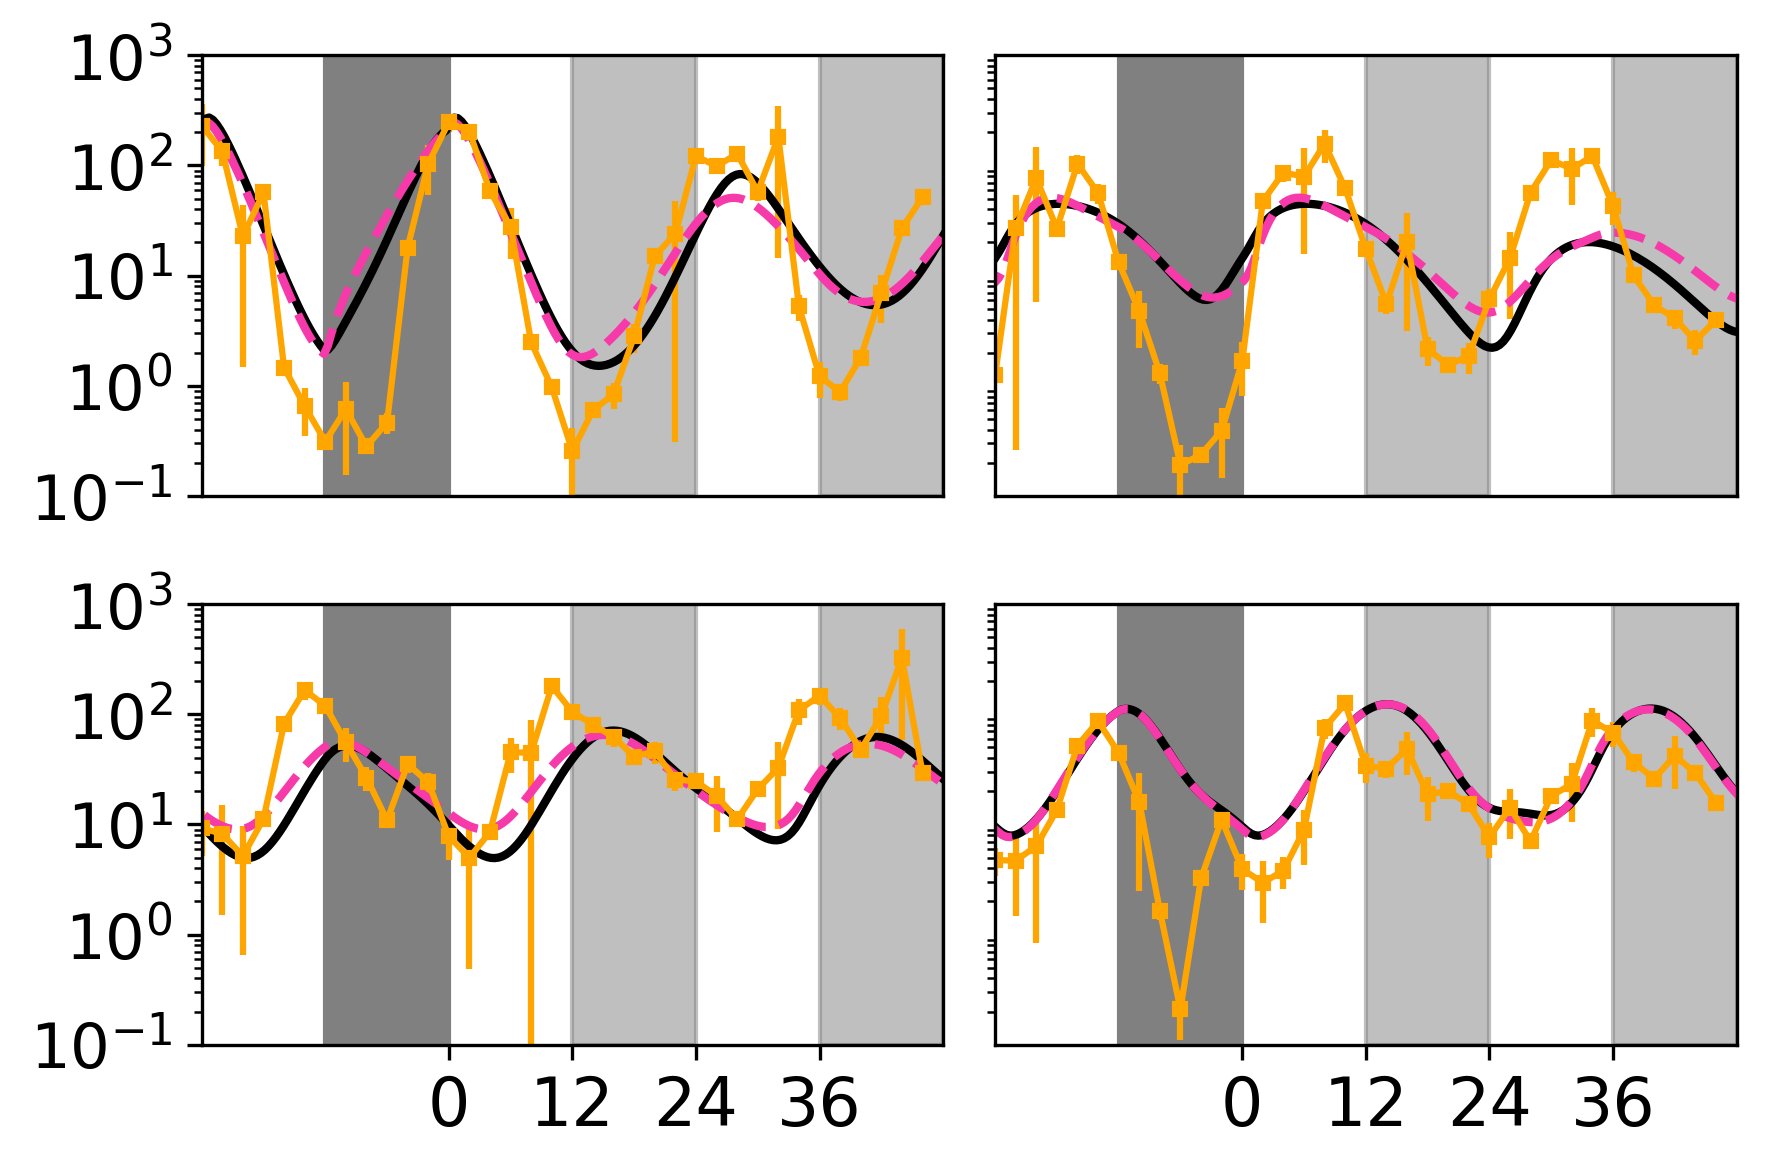

In [157]:
figure(dpi=300)
pink = (242/250.,57/250.,166/250.)
subplot(2,2,1)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cL_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_2_res['time']-24*11,U2020_2_res['[cL_m]'], color='black')
plot(U2020_5_res['time']-24*11,U2020_5_res['[cL_m]'], '--',color=pink)

yscale('log')
ylim(1e-1,1e3)
xlim(-24,24*2)
xticks([])
yticks(fontsize=15)
axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)


subplot(2,2,2)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cP7_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_2_res['time']-24*11,U2020_2_res['[cP7_m]'], color='black')
plot(U2020_5_res['time']-24*11,U2020_5_res['[cP7_m]'], '--',color=pink)

yscale('log')
xticks([])
yticks([])

ylim(1e-1,1e3)
xlim(-24,24*2)

axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)
    
    
subplot(2,2,3)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cT_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_2_res['time']-24*11,U2020_2_res['[cT_m]'], color='black')
plot(U2020_5_res['time']-24*11,U2020_5_res['[cT_m]'], '--',color=pink)

yscale('log')
ylim(1e-1,1e3)
xlim(-24,24*2)
xticks(range(0,24*2,12), fontsize=16)
yticks(fontsize=15)
axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)


subplot(2,2,4)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cLUX_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_2_res['time']-24*11,U2020_2_res['[cLUX_m]'], color='black')
plot(U2020_5_res['time']-24*11,U2020_5_res['[cLUX_m]'], '--', color=pink)

yscale('log')
yticks([])
ylim(1e-1,1e3)
xlim(-24,24*2)
xticks(range(0,24*2,12), fontsize=16)
axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)
tight_layout()
savefig('U2020_2_and_U2020_5_vs_TiMEt.svg', format='svg', dpi=600, transparent=True)

In [162]:
#convert models into tellurium 
U2020_4 = te.loadSBMLModel('U2020.3.xml')
U2020_4.exportToAntimony('U2020.3.txt')
U2020_6 = te.loadSBMLModel('U2020.6.xml')
U2020_6.exportToAntimony('U2020.6.txt')

In [168]:
U2020_3 = te.loadAntimonyModel('U2020.3.txt')
U2020_6 = te.loadAntimonyModel('U2020.6.txt')

In [169]:
U2020_3_res = U2020_3.simulate(0,24*15,1000)
U2020_6_res = U2020_6.simulate(0,24*15,1000)

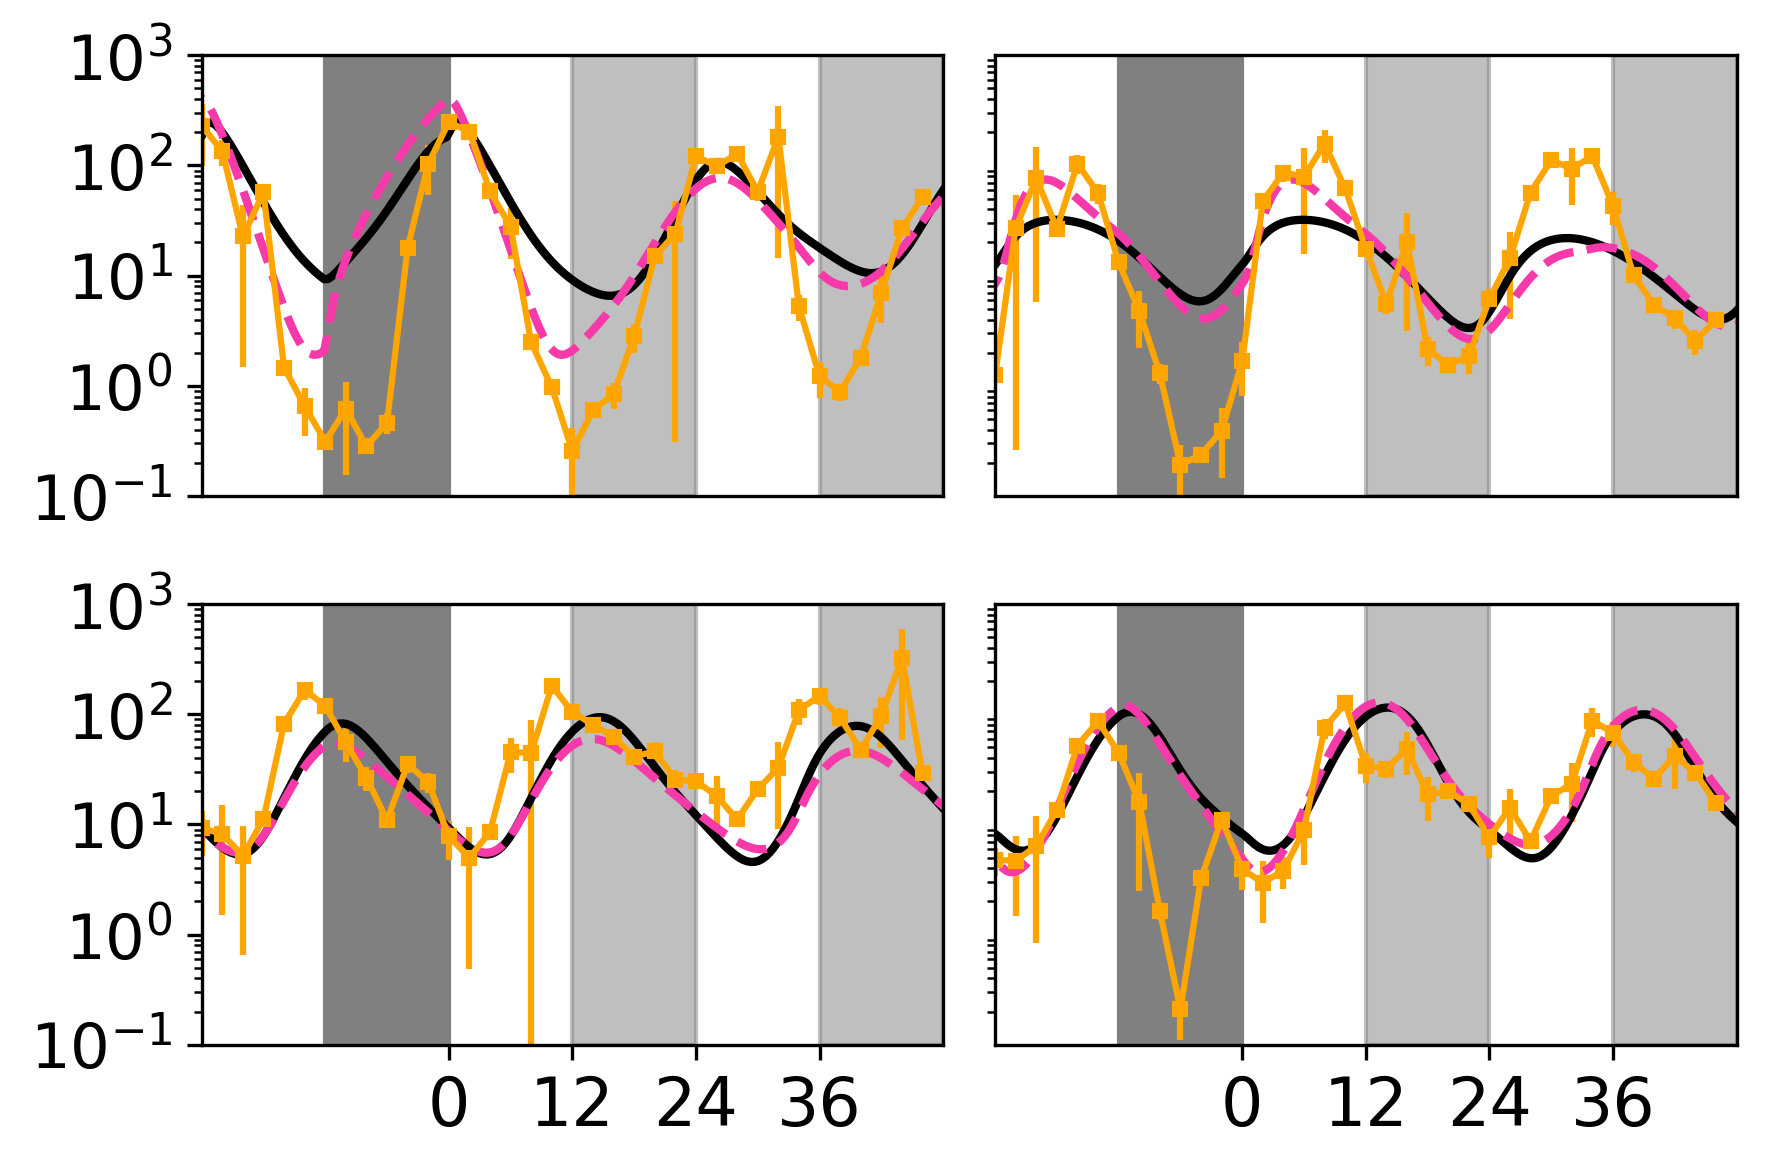

In [171]:
figure(dpi=300)
pink = (242/250.,57/250.,166/250.)
subplot(2,2,1)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cL_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_3_res['time']-24*11,U2020_3_res['[cL_m]'], color='black')
plot(U2020_6_res['time']-24*11,U2020_6_res['[cL_m]'], '--',color=pink)

yscale('log')
ylim(1e-1,1e3)
xlim(-24,24*2)
xticks([])
yticks(fontsize=15)
axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)


subplot(2,2,2)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cP7_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_3_res['time']-24*11,U2020_3_res['[cP7_m]'], color='black')
plot(U2020_6_res['time']-24*11,U2020_6_res['[cP7_m]'], '--',color=pink)

yscale('log')
xticks([])
yticks([])

ylim(1e-1,1e3)
xlim(-24,24*2)

axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)
    
    
subplot(2,2,3)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cT_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_3_res['time']-24*11,U2020_3_res['[cT_m]'], color='black')
plot(U2020_6_res['time']-24*11,U2020_6_res['[cT_m]'], '--',color=pink)

yscale('log')
ylim(1e-1,1e3)
xlim(-24,24*2)
xticks(range(0,24*2,12), fontsize=16)
yticks(fontsize=15)
axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)


subplot(2,2,4)
time, var_mean, var_std = Keyed_list_to_arrays(data, 'col_0_LL', 'log_cLUX_m')
errorbar(time-24*11, var_mean,yerr=var_std, marker='s', color='orange', lw=1.5, ms=3)
plot(U2020_3_res['time']-24*11,U2020_3_res['[cLUX_m]'], color='black')
plot(U2020_6_res['time']-24*11,U2020_6_res['[cLUX_m]'], '--', color=pink)

yscale('log')
yticks([])
ylim(1e-1,1e3)
xlim(-24,24*2)
xticks(range(0,24*2,12), fontsize=16)
axvspan(-12,0,color='gray')
for i in range(0,2,1):
    axvspan(12+24*i,24*(i+1),color='gray', alpha=0.5)
tight_layout()
savefig('U2020_3_and_U2020_6_vs_TiMEt.svg', format='svg', dpi=600, transparent=True)